In [2]:
import numpy as np
import numpy.linalg as la
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from EDMtoolkit import *

%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [3]:
"""
Vision for this code: easy interface where I can see the timeseries length, species, and visualize the data
all very fast.

GOAL 1:
Print all species names w/ timeseries length and number of missing values

GOAL 2:
Produce plots for timeseries given species name?

"""

'\nVision for this code: easy interface where I can see the timeseries length, species, and visualize the data\nall very fast.\n\nGOAL 1:\nPrint all species names w/ timeseries length and number of missing values\n\nGOAL 2:\nProduce plots for timeseries given species name?\n\n'

In [4]:
fileMeta = "../Datasets/GPDD/data/df35b.234.1-DATA.csv"
fileTaxon = "../Datasets/GPDD/data/df35b.236.1-DATA.csv"
fileData = "../Datasets/GPDD/data/df35b.233.1-DATA.csv"
meta = pd.read_csv(fileMeta,encoding="utf-8",na_filter=False)
taxon = pd.read_csv(fileTaxon,encoding="unicode_escape",na_filter=True)
data = pd.read_csv(fileData,encoding="unicode_escape",na_filter=True)

meta.sort_values("DatasetLength", inplace=True, ascending=False)

pd.option_context("display.max_rows","display.max_columns")

# Lake Geneva has alot of data points, some NAs, is not restricted use, but has crap temperature data
# Esthwaite Water Zooplankton has almost 0 NAs, good temp data, is of reasonable size, and is not restricted use - BINGO

In [5]:
for i in meta["MainID"]:    
    piss = int(meta.query(f"MainID == {i}")["DatasetLength"])
    tid = int(meta.query(f"MainID == {i}")["TaxonID"])
    name = taxon.query(f"TaxonID == {tid}")["CommonName"].iloc[0]
    
    y1 = int(meta.query(f"MainID == {i}")["StartYear"])
    y2 = int(meta.query(f"MainID == {i}")["EndYear"])
    
    print(f"{piss}, {name}, ({y1}-{y2}) [{i}]")
    

1007, Leafhopper, (1974-1994) [8862]
939, Cuban cockroach, (1974-1994) [8720]
920, Unknown, (1974-1994) [8939]
901, Unknown, (1974-1994) [9094]
866, None, (1974-1994) [8887]
840, Unknown, (1974-1994) [8779]
805, Mole crickets or Tree crickets
                             crickets, swierszcze, (1976-1994) [9143]
794, Unknown, (1974-1994) [8792]
759, Bush cricket or Long-horned katydid, (1974-1994) [9112]
747, Praying mantid, (1974-1994) [9114]
734, None, (1978-1994) [8886]
712, None, (1974-1994) [8984]
710, Unknown, (1974-1994) [8662]
693, Unknown, (1974-1994) [8738]
682, None, (1974-1994) [8976]
664, Unknown, (1974-1994) [8747]
650, Unknown, (1974-1994) [8804]
643, Froghopper, (1974-1994) [8780]
633, None, (1974-1994) [8883]
626, Bush cricket or Long-horned katydid, (1977-1994) [9152]
616, Bug, (1974-1994) [9052]
615, Unknown, (1974-1994) [8807]
611, Bush cricket or Long-horned katydid, (1977-1994) [9161]
609, Bush cricket or Long-horned katydid, (1974-1994) [9106]
588, Unknown, (1974-

286, Grain aphid, (1969-1990) [8291]
286, Oat aphid, (1969-1990) [8290]
286, Foxglove aphid, (1969-1990) [8446]
286, Aphid, (1969-1990) [8445]
286, Bean aphid, (1969-1990) [8444]
286, Aphid, (1969-1990) [8274]
286, Leaf curling aphid, (1969-1990) [8447]
286, Oat aphid, (1969-1990) [8410]
286, Unknown, (1969-1990) [8398]
286, Rosy apple aphid, (1969-1990) [8272]
286, Strawberry aphid, (1969-1990) [8225]
286, Beech aphid, (1969-1990) [8224]
286, Aphid, (1969-1990) [8223]
286, Lettuce aphid, (1969-1990) [8222]
286, Peach-potato aphid, (1969-1990) [8221]
286, Violet aphid or ornate aphid, (1969-1990) [8220]
286, Shallot aphid, (1969-1990) [8219]
286, Unknown, (1969-1990) [8218]
286, Rose grain aphid, (1969-1990) [8217]
286, Violet aphid or ornate aphid, (1969-1990) [8402]
286, Prune aphid, (1969-1990) [8395]
286, Unknown, (1969-1990) [8216]
286, Potato aphid, (1969-1990) [8215]
286, Currant-Sowthistle aphid, (1969-1990) [8214]
286, Prune aphid, (1969-1990) [8213]
286, Aphid, (1969-1990) [8

260, Cabbage aphid, (1969-1988) [8298]
260, Aphid, (1971-1990) [8147]
260, Bean aphid, (1971-1990) [8146]
260, Aphid, (1971-1990) [8420]
260, Pea aphid, (1971-1990) [8145]
260, Peach-potato aphid, (1969-1988) [8373]
260, Corn leaf aphid, (1969-1990) [8379]
260, Grain aphid, (1969-1990) [8381]
260, Shallot aphid, (1969-1988) [8371]
260, Spruce aphid, (1971-1990) [8154]
260, Rosy apple aphid, (1971-1990) [8422]
260, Willow-carrot aphid, (1971-1990) [8151]
260, Spruce aphid, (1971-1990) [8423]
260, Sycamore aphid, (1969-1988) [8301]
260, Aphid, (1971-1990) [8152]
260, Aphid, (1971-1990) [8424]
260, Sycamore aphid, (1971-1990) [8153]
260, Prune aphid, (1971-1990) [8425]
260, Currant-Sowthistle aphid, (1971-1990) [8426]
260, Sycamore aphid, (1971-1990) [8421]
260, Leaf curling aphid, (1969-1988) [8297]
260, Pea aphid, (1969-1988) [8293]
260, Potato aphid, (1971-1990) [8427]
260, Leaf curling aphid, (1971-1990) [8149]
260, Aphid, (1969-1990) [8382]
260, Violet aphid or ornate aphid, (1969-19

197, Black Sea bream, (1981-1997) [6850]
197, Norway pout, (1981-1997) [6858]
197, Conger, (1981-1997) [6801]
197, Atlantic herring, (1981-1997) [6800]
197, 5-bearded rockling, (1981-1997) [6798]
197, Rock cook or Small-mouthed wrasse, (1981-1997) [6797]
197, Dragonet, (1981-1997) [6796]
197, None, (1975-1993) [8908]
197, John Dory, (1981-1997) [6862]
197, Topknot, (1981-1997) [6861]
197, Sprat, (1981-1997) [6851]
197, Pout, (1981-1997) [6859]
197, Poor-cod, (1981-1997) [6860]
197, Piper, (1981-1997) [6857]
197, Lesser weaver, (1981-1997) [6854]
197, Lumpsucker, (1981-1997) [6806]
197, Tub gurnard, (1981-1997) [6856]
197, Greater pipefish, (1981-1997) [6852]
197, Nillson's pipefish, (1981-1997) [6853]
197, Scad, (1981-1997) [6855]
195, None, (1974-1993) [8667]
195, Unknown, (1974-1993) [8948]
194, None, (1974-1993) [8664]
194, Hooknose or Pogge, (1981-1997) [6788]
194, None, (1990-1994) [8723]
190, Unknown, (1977-1993) [8822]
190, Unknown, (1974-1993) [9117]
190, None, (1974-1994) [891

129, North American mink, (1763-1891) [9729]
129, Muskrat, (1763-1891) [9732]
129, Bear, (1763-1891) [9722]
129, Beaver, (1763-1891) [9721]
128, Unknown, (1974-1993) [8958]
128, Plaice, (1867-1994) [6657]
128, None, (1974-1993) [8993]
127, Unknown, (1974-1993) [9056]
127, None, (1974-1993) [9969]
126, California vole, (1959-1979) [6524]
126, Bush cricket or Long-horned katydid, (1977-1993) [9170]
126, California vole, (1959-1979) [6525]
125, Cocoa mirid, (1965-1975) [9952]
125, None, (1981-1994) [9030]
125, None, (1974-1992) [8666]
122, Praying mantid, (1974-1993) [9104]
122, Unknown, (1974-1993) [8735]
121, North Atlantic gannet, (1819-1939) [1511]
121, Chinch bug, (1820-1940) [6768]
121, North Atlantic gannet, (1819-1939) [1505]
121, None, (1974-1993) [8953]
121, North Atlantic gannet, (1819-1939) [1509]
121, North Atlantic gannet, (1819-1939) [1510]
121, North Atlantic gannet, (1819-1939) [1508]
121, North Atlantic gannet, (1819-1939) [1512]
121, North Atlantic gannet, (1819-1939) [

63, North American badger or American badger, (1919-1981) [72]
63, American black bear, (1919-1981) [109]
63, North American mink, (1919-1981) [438]
63, Canadian lynx, (1919-1981) [411]
63, North American mink, (1919-1981) [435]
63, North American mink, (1919-1981) [436]
63, American black bear, (1919-1981) [100]
63, Canadian lynx, (1919-1981) [410]
63, Canadian lynx, (1919-1981) [409]
63, North American mink, (1919-1981) [437]
63, Beaver, (1919-1981) [146]
63, North American badger or American badger, (1919-1981) [73]
63, North American badger or American badger, (1919-1981) [71]
63, American black bear, (1919-1981) [99]
63, Arctic fox, (1919-1981) [310]
63, Coyote or  Prarie wolf, (1919-1981) [246]
63, Cougar or Mountain lion, (1919-1981) [497]
63, Beaver, (1919-1981) [145]
63, Japanese black bear, (1935-1997) [20577]
63, Beaver, (1919-1981) [144]
63, Polar bear, (1919-1981) [141]
63, Coyote or  Prarie wolf, (1919-1981) [250]
63, Coyote or  Prarie wolf, (1919-1981) [249]
63, Coyote o

51, American red fox, (1931-1981) [388]
51, Polar bear, (1931-1981) [143]
51, North American badger or American badger, (1931-1981) [97]
51, American red fox, (1931-1981) [368]
51, American red fox, (1931-1981) [391]
51, American red fox, (1931-1981) [367]
51, American red fox, (1931-1981) [393]
51, American red fox, (1931-1981) [365]
51, American marten, (1931-1981) [424]
51, Canadian lynx, (1931-1981) [423]
51, North American mink, (1931-1981) [451]
51, Arctic fox, (1931-1981) [317]
51, American marten, (1931-1981) [428]
51, Coyote or  Prarie wolf, (1931-1981) [278]
51, American marten, (1931-1981) [434]
51, North American mink, (1931-1981) [486]
51, American marten, (1931-1981) [433]
51, North American mink, (1931-1981) [480]
51, North American mink, (1931-1981) [479]
51, North American mink, (1931-1981) [477]
51, American red fox, (1931-1981) [383]
51, American marten, (1931-1981) [431]
51, Marsh hawk or Hen harrier, (1905-1955) [5040]
51, North American mink, (1931-1981) [449]
51,

44, Northern flying squirrel, (1952-1995) [20641]
44, Muskrat, (1916-1959) [10148]
44, Haddock, (1950-1993) [1729]
44, Fox, (1914-1957) [9495]
44, Beaver, (1938-1981) [184]
44, Beaver, (1938-1981) [183]
44, Coyote or  Prarie wolf, (1914-1957) [9500]
44, Cod, (1950-1993) [1684]
44, American red fox, (1938-1981) [398]
44, Northern short-tailed shrew, (1952-1995) [20640]
44, Unknown, (1977-1993) [8843]
44, Sockeye salmon, (1949-1992) [1976]
44, North American mink, (1937-1980) [490]
44, Cinereus shrew, (1952-1995) [20637]
44, Woodland jumping mouse, (1952-1995) [20639]
44, Deer mouse, (1952-1995) [20634]
44, Pink salmon, (1952-1995) [1869]
44, American black bear, (1935-1978) [114]
44, Muskrat, (1914-1957) [9491]
44, American red fox, (1938-1981) [370]
44, Praying mantid, (1974-1993) [9111]
44, Sockeye salmon, (1952-1995) [1993]
44, Bobcat, (1938-1981) [230]
44, Atlantic herring, (1950-1993) [1768]
44, Red squirrel, (1952-1995) [20638]
44, American red fox, (1938-1981) [390]
44, Sockeye s

36, Tufted duck, (1958-1993) [20578]
36, Unknown, (1974-1993) [8965]
36, Beaver, (1946-1981) [177]
36, Beaver, (1946-1981) [176]
36, Northern shrike, (1900-1935) [9893]
36, American red fox, (1946-1981) [364]
36, American red fox, (1946-1981) [366]
36, Pink salmon, (1960-1995) [1878]
36, Pink salmon, (1960-1995) [1888]
36, None, (1989-1993) [8935]
36, American red fox, (1946-1981) [378]
35, None, (1975-1993) [8677]
35, Cod, (1959-1993) [1683]
35, Cod, (1959-1993) [1681]
35, None, (1976-1994) [9013]
35, Hake, (1960-1994) [1817]
35, Common shrew, (1964-1981) [10119]
35, Ruffed grouse, (1923-1957) [9470]
35, Peregrine falcon, (1951-1985) [7046]
35, Peregrine falcon, (1951-1985) [7045]
35, Unknown, (1978-1993) [8836]
35, Plaice, (1957-1991) [1901]
35, Bobcat, (1947-1981) [213]
35, Mountain hare or Varying hare, (1924-1958) [10109]
34, North American mink, (1948-1981) [483]
34, Striped skunk, (1858-1891) [9739]
34, North American mink, (1924-1957) [9490]
34, Fisher or  Pekan, (1924-1957) [9

28, Amphipods, (1948-1975) [9784]
28, Eastern spruce budworm, (1945-1972) [10134]
28, Dickcissel, (1967-1994) [9440]
28, Dickcissel, (1967-1994) [9441]
28, Dickcissel, (1967-1994) [9442]
28, Dickcissel, (1967-1994) [9443]
28, Fisher or  Pekan, (1954-1981) [289]
28, Dickcissel, (1967-1994) [9444]
28, Dickcissel, (1967-1994) [9445]
28, Mourning dove, (1949-1976) [1174]
28, Bobcat, (1954-1981) [234]
28, Amphipods, (1948-1975) [9790]
28, Zooplankton, (1948-1975) [9770]
28, Amphipods, (1948-1975) [9787]
28, Voles, (1977-1990) [9931]
28, Amphipods, (1948-1975) [9788]
28, Amphipods, (1948-1975) [9789]
28, Arctic fox, (1866-1893) [1338]
28, Zooplankton, (1948-1975) [9769]
28, Zooplankton, (1948-1975) [9774]
28, Zooplankton, (1948-1975) [9768]
28, Zooplankton, (1948-1975) [9767]
28, Amphipods, (1948-1975) [9781]
28, Zooplankton, (1948-1975) [9775]
28, Amphipods, (1948-1975) [9780]
28, Zooplankton, (1948-1975) [9776]
28, Amphipods, (1948-1975) [9779]
28, Zooplankton, (1948-1975) [9778]
28, Voles

26, Small quaker, (1967-1992) [6893]
26, Unknown, (1967-1992) [6892]
26, Capelin, (1955-1980) [6773]
26, Feathered gothic, (1967-1992) [6891]
26, Bright-line brown-eyed moth, (1967-1992) [6890]
26, Dogs tooth, (1967-1992) [6889]
26, Cod, (1955-1980) [6774]
26, Pale-shouldered brocade, (1967-1992) [6888]
26, Mule deer, (1964-1989) [20660]
26, Dot, (1967-1992) [6886]
26, Pale shining brown, (1967-1992) [6884]
26, Broad-bordered yellow underwing, (1967-1992) [6872]
26, Bordered gothic, (1967-1992) [6883]
26, Nutmeg, (1967-1992) [6882]
26, Autumnal rustic, (1967-1992) [6881]
26, Square-spot rustic, (1967-1992) [6880]
26, Dotted clay, (1967-1992) [6879]
26, Double square-spot, (1967-1992) [6878]
26, Triple-spotted clay, (1967-1992) [6877]
26, Setaceous hebrew character, (1967-1992) [6876]
26, Double dart, (1967-1992) [6875]
26, Unknown, (1967-1992) [6874]
26, None, (1977-1992) [8968]
26, Yellowfin tuna, (1967-1992) [2082]
26, Lesser broad-bordered yellow underwing, (1967-1992) [6873]
26, Ed

24, Wolffish, (1970-1993) [6542]
24, Norwegian topknot, (1970-1993) [6540]
24, Megrim, (1970-1993) [6539]
24, Fulmar, (1958-1981) [6527]
24, Pollack, (1970-1993) [6557]
24, Saithe, (1970-1993) [6556]
24, Unknown, (1974-1993) [8708]
24, Norway pout, (1970-1993) [6558]
24, Ling, (1970-1993) [6560]
24, None, (1979-1991) [9025]
24, None, (1974-1994) [9007]
24, None, (1974-1993) [8975]
24, Unknown, (-9999--9999) [9606]
24, European spruce sawfly, (-9999--9999) [9587]
24, Spruce grouse, (1935-1958) [9480]
24, Silver, (1967-1990) [10101]
24, Silver, (1967-1990) [10144]
24, Brown trout, (1967-1990) [7104]
24, Great cormorant, (1969-1992) [9333]
24, Halibut, (1970-1993) [6572]
24, Scaldfish, (1970-1993) [6571]
24, Flounder, (1970-1993) [6570]
24, Solenette, (1970-1993) [6569]
24, Witch, (1970-1993) [6568]
24, Brill, (1970-1993) [6567]
24, Turbot, (1970-1993) [6566]
24, Sole, (1970-1993) [6565]
24, Plaice, (1970-1993) [6564]
24, Lesser weever, (1970-1993) [6562]
24, Hake, (1970-1993) [6561]
24, 

20, Bobcat, (1962-1981) [232]
20, Pink salmon, (1961-1980) [1876]
20, Lesser-spotted dogfish, (1974-1993) [6548]
20, Pink salmon, (1952-1971) [1868]
20, Magpie, (1976-1995) [1466]
20, Blue tit, (1976-1995) [1467]
20, Eurasian collared-dove, (1976-1995) [1465]
20, Wren, (1976-1995) [1438]
20, Field vole, (1973-1982) [6998]
20, Bank vole, (1973-1982) [6999]
20, Wren, (1976-1995) [1428]
20, Blackcap, (1976-1995) [1429]
20, Whitethroat, (1976-1995) [1430]
20, Willow warbler, (1976-1995) [1431]
20, Pine beauty, (1950-1969) [10065]
20, Spotted flycatcher, (1976-1995) [1432]
20, Starling, (1976-1995) [1433]
20, Yellowhammer, (1976-1995) [1434]
20, Eurasian collared-dove, (1976-1995) [1435]
20, Sockeye salmon, (1952-1971) [1982]
20, Magpie, (1976-1995) [1436]
20, Blue tit, (1976-1995) [1437]
20, Blackcap, (1976-1995) [1469]
20, Blackcap, (1976-1995) [1439]
20, Whitethroat, (1976-1995) [1440]
20, Willow warbler, (1976-1995) [1441]
20, Spotted flycatcher, (1976-1995) [1442]
20, Starling, (1976-1

19, Wren, (1977-1995) [1478]
19, Blackcap, (1977-1995) [1479]
19, Whitethroat, (1977-1995) [1480]
19, Willow warbler, (1977-1995) [1481]
19, Spotted flycatcher, (1977-1995) [1482]
19, Blue tit, (1976-1994) [1457]
19, California vole, (1959-1977) [6714]
19, Eurasian collared-dove, (1976-1994) [1455]
19, Yellowhammer, (1976-1994) [1454]
19, Beech aphid, (1969-1987) [6765]
19, Root vole, (1974-1992) [10059]
19, None, (1975-1993) [9961]
19, Cod, (1962-1980) [6775]
19, Eurasian collared-dove, (1976-1994) [1445]
19, Magpie, (1976-1994) [1446]
19, Blue tit, (1976-1994) [1447]
19, Wren, (1976-1994) [1448]
19, Grey heron, (1934-1952) [1403]
19, Blackcap, (1976-1994) [1449]
19, Whitethroat, (1976-1994) [1450]
19, Willow warbler, (1976-1994) [1451]
19, Tengmalm's owl, (1973-1991) [9922]
19, Spotted flycatcher, (1976-1994) [1452]
19, Starling, (1976-1994) [1453]
19, Starling, (1977-1995) [1483]
19, Sycamore aphid, (1969-1987) [6764]
19, Bank vole, (1974-1992) [10056]
19, Grey-sided vole, red-grey 

17, Small-purple barred, (1968-1984) [6355]
17, Dark chestnut, (1968-1984) [6348]
17, Barred sallow, (1968-1984) [6347]
17, Oak hook-tip, (1968-1984) [6174]
17, Spotted dolphin, (1975-1991) [6637]
17, Flame, (1968-1984) [6229]
17, Nut-tree tussock, (1968-1984) [6346]
17, Chestnut, (1968-1984) [6345]
17, Orange sallow, (1968-1984) [6344]
17, Red underwing, (1968-1984) [6343]
17, Setaceous hebrew character, (1968-1984) [6228]
17, Large yellow underwing, (1968-1984) [6234]
17, Grey arches, (1968-1984) [6235]
17, Brown rustic, (1968-1984) [6314]
17, Broad-bordered yellow underwing, (1968-1984) [6237]
17, Least yellow underwing, (1968-1984) [6245]
17, Shears, (1968-1984) [6244]
17, Dot, (1968-1984) [6243]
17, Lesser broad-bordered yellow underwing, (1968-1984) [6242]
17, Broom, (1968-1984) [6241]
17, Cabbage moth, (1968-1984) [6240]
17, Lesser yellow underwing, (1968-1984) [6239]
17, Treble lines, (1968-1984) [6274]
17, Brown-lie bright-eye, (1968-1984) [6276]
17, Figure of eighty, (1968-19

17, Lesser swallow prominent, (1968-1984) [6150]
17, Small dotted buff, (1968-1984) [6300]
17, Lunar-spotted pinion, (1968-1984) [6301]
17, Hawthorn's minor, (1968-1984) [6303]
17, Unknown, (1968-1984) [6504]
17, Chocolate-tip, (1968-1984) [6158]
17, Pale oak beauty, (1968-1984) [6512]
17, Grey scalloped bar, (1968-1984) [6511]
17, Horse chestnut, (1968-1984) [6510]
17, Great oak beauty, (1968-1984) [6509]
17, Latticed heath, (1968-1984) [6508]
17, Unknown, (1968-1984) [6507]
17, Dotted carpet, (1968-1984) [6506]
17, Brown silver-line, (1968-1984) [6505]
17, Satin beauty, (1968-1984) [6502]
17, Willow beauty, (1968-1984) [6496]
17, Oak beauty, (1968-1984) [6501]
17, Bordered beauty, (1968-1984) [6500]
17, The cresent, (1968-1984) [6306]
17, Satin lutestring, (1968-1984) [6159]
17, Small angle shades, (1968-1984) [6305]
17, Brussels lace, (1968-1984) [6499]
17, Brindled beauty, (1968-1984) [6498]
17, Brimstone moth, (1968-1984) [6497]
17, Lesser-spotted pinion, (1968-1984) [6304]
17, El

16, Plaice, (1976-1991) [1896]
16, Voles, (1984-1991) [9926]
16, Sockeye salmon, (1968-1983) [1990]
16, None, (1974-1992) [9072]
16, Red-spotted newt, (1979-1994) [20601]
16, Yellowfin sole, (1964-1979) [2099]
16, Dwarfed salamander, (1979-1994) [20605]
16, Transparent goby, (1981-1996) [1091]
16, None, (1982-1992) [8932]
16, Chaffinch, (1950-1965) [6638]
16, Pink salmon, (1934-1949) [1860]
16, Unknown, (1975-1993) [8903]
16, Pink salmon, (1979-1994) [1828]
16, Sole, (1981-1996) [1111]
16, Thornback ray or Roker, (1981-1996) [1110]
16, Hooknose or Pogge, (1981-1996) [1088]
16, Cod, (1981-1996) [1100]
16, Sardine, (1974-1989) [1942]
16, Brazilian sardine, (1977-1992) [1938]
16, 5-bearded rockling, (1981-1996) [1093]
16, Northern rockling, (1981-1996) [1094]
16, Atlantic herring, (1981-1996) [1095]
16, Conger, (1981-1996) [1096]
16, Bass, (1981-1996) [1097]
16, Snake pipefish, (1981-1996) [1098]
16, Grey gurnard, (1981-1996) [1099]
16, Common eel, (1981-1996) [1090]
16, Sand goby, (1981-

14, Great cormorant, (1979-1992) [51]
14, Great cormorant, (1979-1992) [50]
14, Blue marlin, (1956-1969) [9840]
14, Striped marlin, (1956-1969) [9839]
14, Striped marlin, (1956-1969) [9838]
14, Tufted duck, (1980-1993) [29]
14, Marbled salamander, (1981-1994) [20612]
14, Canada goose, (1980-1993) [27]
14, Capelin, (1978-1991) [1657]
14, Wood duck, (1986-1999) [20643]
14, Hooded merganser, (1986-1999) [20644]
14, Red-necked grebe, (1980-1993) [22]
14, Blackcap, (1982-1995) [1286]
14, Whooper swan, (1980-1993) [26]
14, Snowshoe hare or American varying hare, (1946-1959) [9464]
14, White-billed diver, (1980-1993) [21]
14, Virile crayfish, (1981-1994) [6084]
14, Virile crayfish, (1981-1994) [6085]
14, Blackbird, (1982-1995) [1287]
14, Wild boar, (1965-1978) [9429]
14, Chum salmon, (1961-1974) [1665]
14, Lapwing, (1962-1975) [9523]
14, Chum salmon, (1947-1960) [1666]
14, Virile crayfish, (1981-1994) [6086]
14, Virile crayfish, (1981-1994) [6087]
14, Rusty crayfish, (1981-1994) [6090]
14, Gr

12, Grey fox, (1970-1981) [318]
12, Grey partridge, (1924-1935) [1370]
12, Unknown, (-9999--9999) [9552]
12, Squirrels, (1938-1949) [9510]
12, Unknown, (-9999--9999) [9553]
12, Stoat, (1928-1939) [9516]
12, Eye-spotted bud moth or Apple bud moth, (1965-1976) [9233]
12, Eye-spotted bud moth or Apple bud moth, (1965-1976) [9234]
12, Grey fox, (1970-1981) [321]
12, Codling moth, (1965-1976) [9235]
12, Codling moth, (1965-1976) [9236]
12, Grey fox, (1970-1981) [320]
12, Unknown, (-9999--9999) [9554]
12, Gall midge, (-9999--9999) [9555]
12, Bullfinch, (1984-1995) [1309]
12, Grey fox, (1970-1981) [319]
12, Eye-spotted bud moth or Apple bud moth, (-9999--9999) [9629]
12, Gall midge, (-9999--9999) [9556]
12, Fox, (1913-1924) [9520]
12, Grey-sided vole, red-grey vole, (1950-1961) [9854]
12, Eye-spotted bud moth or Apple bud moth, (-9999--9999) [9634]
12, Eye-spotted bud moth or Apple bud moth, (-9999--9999) [9631]
12, Eye-spotted bud moth or Apple bud moth, (-9999--9999) [9628]
12, Townsend's c

11, None, (1980-1990) [9028]
11, Red-backed vole, (1954-1964) [6702]
11, Yellow-bellied marmot, (1962-1972) [6724]
11, Trowbridges shrew, (1954-1964) [6704]
11, None, (1978-1993) [9024]
11, None, (1979-1992) [9020]
11, Sockeye salmon, (1948-1958) [2023]
11, Mountain goat, (1989-1999) [20647]
11, Grey partridge, (1949-1959) [2731]
11, Wild boar, (1965-1975) [9431]
11, Common shrew, (1973-1983) [10086]
11, Greater kudu, (1974-1984) [6660]
11, Desert pocket mouse, (1977-1987) [1383]
11, Merriam's kangaroo rat, (1977-1987) [1382]
11, Ord's kangaroo rat, (1977-1987) [1381]
11, Banner-tailed kangaroo rat, (1977-1987) [1380]
11, Owl, (1948-1958) [9505]
11, Atlantic herring, (1977-1987) [1775]
11, Atlantic herring, (1970-1980) [6777]
11, Cactus mouse, (1977-1987) [1385]
11, Tengmalm's owl, (1977-1987) [9369]
11, Coyote or  Prarie wolf, (1971-1981) [247]
11, Common shrew, (1977-1987) [9368]
11, Ruffed grouse, (1965-1975) [9226]
11, Red Pine, Norway pine or Canadian pine., (1968-1978) [9227]
11,

10, Green-veined white, (1976-1985) [3802]
10, Orange tip, (1976-1985) [3803]
10, Common blue, (1976-1985) [3807]
10, Red admiral, (1976-1985) [3808]
10, Small tortoiseshell, (1976-1985) [3810]
10, Peacock, (1976-1985) [3811]
10, Wall, (1976-1985) [3814]
10, Hedge brown, (1976-1985) [3816]
10, Meadow brown, (1976-1985) [3817]
10, Small heath, (1976-1985) [3818]
10, Orange tip, (1976-1985) [3780]
10, Green-veined white, (1976-1985) [3779]
10, Green-veined white, (1976-1985) [3778]
10, Small white, (1976-1985) [3776]
10, Small white, (1976-1985) [3741]
10, Green-veined white, (1976-1985) [3743]
10, Green-veined white, (1976-1985) [3744]
10, Orange tip, (1976-1985) [3745]
10, Purple hairstreak, (1976-1985) [3746]
10, Small copper, (1976-1985) [3750]
10, Common blue, (1976-1985) [3752]
10, White admiral, (1976-1985) [3754]
10, Small tortoiseshell, (1976-1985) [3756]
10, Peacock, (1976-1985) [3757]
10, Comma, (1976-1985) [3759]
10, Pearl bordered fritillary, (1976-1985) [3760]
10, Speckled 

10, Small copper, (1976-1985) [2973]
10, Brown argus, (1976-1985) [2974]
10, Common blue, (1976-1985) [2976]
10, Chalkhill blue, (1976-1985) [2978]
10, Small tortoiseshell, (1976-1985) [2985]
10, Peacock, (1976-1985) [2986]
10, Comma, (1976-1985) [2988]
10, Dark green fritillary, (1976-1985) [2989]
10, Speckled wood, (1976-1985) [2990]
10, Aphid, (1979-1988) [9296]
10, Aphid, (1979-1988) [9297]
10, Wall, (1976-1985) [2991]
10, March crane fly, (1954-1963) [9304]
10, March crane fly, (1954-1963) [9305]
10, March crane fly, (1954-1963) [9306]
10, March crane fly, (1954-1963) [9307]
10, Marbled white, (1976-1985) [2993]
10, Hedge brown, (1976-1985) [2994]
10, Meadow brown, (1976-1985) [2995]
10, Small heath, (1976-1985) [2996]
10, Ringlet, (1976-1985) [2997]
10, Small skipper, (1976-1985) [2998]
10, Large skipper, (1976-1985) [2999]
10, Brimstone, (1976-1985) [3001]
10, Green-veined white, (1976-1985) [2964]
10, Small white, (1976-1985) [2962]
10, Large white, (1976-1985) [2960]
10, Small

10, Large white, (1976-1985) [2869]
10, Great tit, (1959-1968) [9202]
10, Small white, (1976-1985) [2872]
10, Green-veined white, (1976-1985) [2873]
10, Green-veined white, (1976-1985) [2874]
10, Orange tip, (1976-1985) [2875]
10, Small copper, (1976-1985) [2878]
10, Common blue, (1976-1985) [2879]
10, Small white, (1976-1985) [3112]
10, Green-veined white, (1976-1985) [3075]
10, Tea cluster caterpillar, (-9999--9999) [9547]
10, Small copper, (1976-1985) [3303]
10, Small pearl bordered fritillary, (1976-1985) [3409]
10, Long-haired chimpanzee, (1964-1973) [6769]
10, Tea cluster caterpillar, (-9999--9999) [9548]
10, Tea cluster caterpillar, (-9999--9999) [9549]
10, Tea cluster caterpillar, (-9999--9999) [9550]
10, Comma, (1976-1985) [3277]
10, Small pearl bordered fritillary, (1976-1985) [3278]
10, Pearl bordered fritillary, (1976-1985) [3279]
10, Dark green fritillary, (1976-1985) [3280]
10, Speckled wood, (1976-1985) [3282]
10, Light brown apple moth, (-9999--9999) [9590]
10, Light br

9, Virile crayfish, (1981-1989) [6095]
9, Virile crayfish, (1981-1989) [6092]
9, Sheetweb, Dwarf spider or Money spider, (1962-1970) [7109]
9, Rusty crayfish, (1981-1989) [6089]
9, Virile crayfish, (1981-1989) [6096]
9, Crab spider, (1962-1970) [7110]
9, Coal tit, (1949-1957) [2725]
9, Sea urchin, (1973-1981) [7122]
9, Rusty crayfish, (1981-1989) [6088]
9, Virile crayfish, (1981-1989) [6093]
9, Northern clearwater crayfish, (1981-1989) [6077]
9, Dwarf coyote brush, Chaparral broom, Coyote bush, (1977-1985) [6997]
9, Northern clearwater crayfish, (1981-1989) [6078]
9, Northern clearwater crayfish, (1981-1989) [6079]
9, Northern clearwater crayfish, (1981-1989) [6080]
9, Northern clearwater crayfish, (1981-1989) [6072]
9, Small cribellate spider, (1962-1970) [7106]
9, Northern clearwater crayfish, (1981-1989) [6071]
9, Summer flounder, (1982-1990) [1959]
9, Dwarf spider, (1962-1970) [7105]
9, Northern clearwater crayfish, (1981-1989) [6070]
9, Northern clearwater crayfish, (1981-1989) [6

In [5]:
def getTimeSeries(t):
    return data.query(f"MainID == {t}")["Population"].to_numpy()


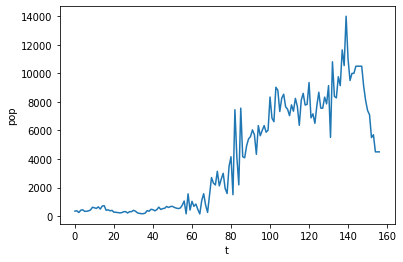

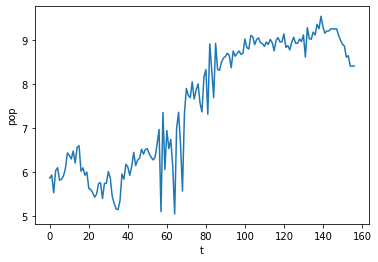

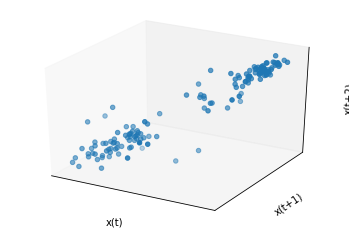

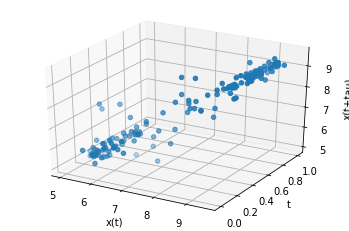

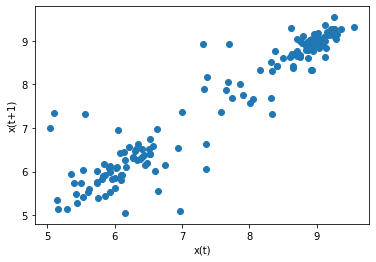

In [6]:
s = getTimeSeries(9707)
plotTS(s)
s = np.log(s+1)
s = s.reshape((s.shape[0],1))

plotTS(s)
poincare3d(s)
poincareT(s)
poincare2d(s)

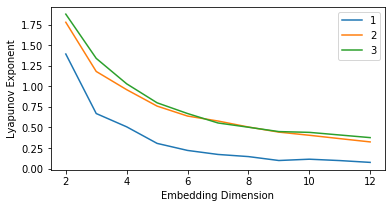

In [99]:
FNNplot(s)

In [100]:
# s = np.array([1,2,3,4,5,6,7,8,9,10,0])

In [101]:
Xr=standardize(s)

t = np.linspace(0,1,num=len(Xr))

In [118]:
step = 1
maxLags = 6
horizon = 1

resolution = 15
thetas = np.linspace(0, 100, resolution)
deltas = np.linspace(0, 1, resolution)


In [119]:
thetaNS, deltaNS, lagNS, errorNS, landNS = NSMapOptimize(Xr, t, horizon, maxLags, step, thetas, deltas, returnLandscape=True)

(0.0,0.0,2)
(7.142857142857143,0.0,2)
(14.285714285714286,0.0,2)
(21.42857142857143,0.0,2)
(28.571428571428573,0.0,2)
(35.714285714285715,0.0,2)
(42.85714285714286,0.0,2)
(50.0,0.0,2)
(57.142857142857146,0.0,2)
(64.28571428571429,0.0,2)
(71.42857142857143,0.0,2)
(78.57142857142857,0.0,2)
(85.71428571428572,0.0,2)
(92.85714285714286,0.0,2)
(100.0,0.0,2)
(0.0,0.07142857142857142,2)
(7.142857142857143,0.07142857142857142,2)
(14.285714285714286,0.07142857142857142,2)
(21.42857142857143,0.07142857142857142,2)
(28.571428571428573,0.07142857142857142,2)
(35.714285714285715,0.07142857142857142,2)
(42.85714285714286,0.07142857142857142,2)
(50.0,0.07142857142857142,2)
(57.142857142857146,0.07142857142857142,2)
(64.28571428571429,0.07142857142857142,2)
(71.42857142857143,0.07142857142857142,2)
(78.57142857142857,0.07142857142857142,2)
(85.71428571428572,0.07142857142857142,2)
(92.85714285714286,0.07142857142857142,2)
(100.0,0.07142857142857142,2)
(0.0,0.14285714285714285,2)
(7.142857142857143,0.1

(35.714285714285715,0.0,3)
(42.85714285714286,0.0,3)
(50.0,0.0,3)
(57.142857142857146,0.0,3)
(64.28571428571429,0.0,3)
(71.42857142857143,0.0,3)
(78.57142857142857,0.0,3)
(85.71428571428572,0.0,3)
(92.85714285714286,0.0,3)
(100.0,0.0,3)
(0.0,0.07142857142857142,3)
(7.142857142857143,0.07142857142857142,3)
(14.285714285714286,0.07142857142857142,3)
(21.42857142857143,0.07142857142857142,3)
(28.571428571428573,0.07142857142857142,3)
(35.714285714285715,0.07142857142857142,3)
(42.85714285714286,0.07142857142857142,3)
(50.0,0.07142857142857142,3)
(57.142857142857146,0.07142857142857142,3)
(64.28571428571429,0.07142857142857142,3)
(71.42857142857143,0.07142857142857142,3)
(78.57142857142857,0.07142857142857142,3)
(85.71428571428572,0.07142857142857142,3)
(92.85714285714286,0.07142857142857142,3)
(100.0,0.07142857142857142,3)
(0.0,0.14285714285714285,3)
(7.142857142857143,0.14285714285714285,3)
(14.285714285714286,0.14285714285714285,3)
(21.42857142857143,0.14285714285714285,3)
(28.571428571

(78.57142857142857,0.0,4)
(85.71428571428572,0.0,4)
(92.85714285714286,0.0,4)
(100.0,0.0,4)
(0.0,0.07142857142857142,4)
(7.142857142857143,0.07142857142857142,4)
(14.285714285714286,0.07142857142857142,4)
(21.42857142857143,0.07142857142857142,4)
(28.571428571428573,0.07142857142857142,4)
(35.714285714285715,0.07142857142857142,4)
(42.85714285714286,0.07142857142857142,4)
(50.0,0.07142857142857142,4)
(57.142857142857146,0.07142857142857142,4)
(64.28571428571429,0.07142857142857142,4)
(71.42857142857143,0.07142857142857142,4)
(78.57142857142857,0.07142857142857142,4)
(85.71428571428572,0.07142857142857142,4)
(92.85714285714286,0.07142857142857142,4)
(100.0,0.07142857142857142,4)
(0.0,0.14285714285714285,4)
(7.142857142857143,0.14285714285714285,4)
(14.285714285714286,0.14285714285714285,4)
(21.42857142857143,0.14285714285714285,4)
(28.571428571428573,0.14285714285714285,4)
(35.714285714285715,0.14285714285714285,4)
(42.85714285714286,0.14285714285714285,4)
(50.0,0.14285714285714285,4)
(

(7.142857142857143,0.07142857142857142,5)
(14.285714285714286,0.07142857142857142,5)
(21.42857142857143,0.07142857142857142,5)
(28.571428571428573,0.07142857142857142,5)
(35.714285714285715,0.07142857142857142,5)
(42.85714285714286,0.07142857142857142,5)
(50.0,0.07142857142857142,5)
(57.142857142857146,0.07142857142857142,5)
(64.28571428571429,0.07142857142857142,5)
(71.42857142857143,0.07142857142857142,5)
(78.57142857142857,0.07142857142857142,5)
(85.71428571428572,0.07142857142857142,5)
(92.85714285714286,0.07142857142857142,5)
(100.0,0.07142857142857142,5)
(0.0,0.14285714285714285,5)
(7.142857142857143,0.14285714285714285,5)
(14.285714285714286,0.14285714285714285,5)
(21.42857142857143,0.14285714285714285,5)
(28.571428571428573,0.14285714285714285,5)
(35.714285714285715,0.14285714285714285,5)
(42.85714285714286,0.14285714285714285,5)
(50.0,0.14285714285714285,5)
(57.142857142857146,0.14285714285714285,5)
(64.28571428571429,0.14285714285714285,5)
(71.42857142857143,0.142857142857142

(28.571428571428573,0.07142857142857142,6)
(35.714285714285715,0.07142857142857142,6)
(42.85714285714286,0.07142857142857142,6)
(50.0,0.07142857142857142,6)
(57.142857142857146,0.07142857142857142,6)
(64.28571428571429,0.07142857142857142,6)
(71.42857142857143,0.07142857142857142,6)
(78.57142857142857,0.07142857142857142,6)
(85.71428571428572,0.07142857142857142,6)
(92.85714285714286,0.07142857142857142,6)
(100.0,0.07142857142857142,6)
(0.0,0.14285714285714285,6)
(7.142857142857143,0.14285714285714285,6)
(14.285714285714286,0.14285714285714285,6)
(21.42857142857143,0.14285714285714285,6)
(28.571428571428573,0.14285714285714285,6)
(35.714285714285715,0.14285714285714285,6)
(42.85714285714286,0.14285714285714285,6)
(50.0,0.14285714285714285,6)
(57.142857142857146,0.14285714285714285,6)
(64.28571428571429,0.14285714285714285,6)
(71.42857142857143,0.14285714285714285,6)
(78.57142857142857,0.14285714285714285,6)
(85.71428571428572,0.14285714285714285,6)
(92.85714285714286,0.1428571428571428

(57.142857142857146,0.07142857142857142,7)
(64.28571428571429,0.07142857142857142,7)
(71.42857142857143,0.07142857142857142,7)
(78.57142857142857,0.07142857142857142,7)
(85.71428571428572,0.07142857142857142,7)
(92.85714285714286,0.07142857142857142,7)
(100.0,0.07142857142857142,7)
(0.0,0.14285714285714285,7)
(7.142857142857143,0.14285714285714285,7)
(14.285714285714286,0.14285714285714285,7)
(21.42857142857143,0.14285714285714285,7)
(28.571428571428573,0.14285714285714285,7)
(35.714285714285715,0.14285714285714285,7)
(42.85714285714286,0.14285714285714285,7)
(50.0,0.14285714285714285,7)
(57.142857142857146,0.14285714285714285,7)
(64.28571428571429,0.14285714285714285,7)
(71.42857142857143,0.14285714285714285,7)
(78.57142857142857,0.14285714285714285,7)
(85.71428571428572,0.14285714285714285,7)
(92.85714285714286,0.14285714285714285,7)
(100.0,0.14285714285714285,7)
(0.0,0.21428571428571427,7)
(7.142857142857143,0.21428571428571427,7)
(14.285714285714286,0.21428571428571427,7)
(21.42857

(78.57142857142857,0.07142857142857142,8)
(85.71428571428572,0.07142857142857142,8)
(92.85714285714286,0.07142857142857142,8)
(100.0,0.07142857142857142,8)
(0.0,0.14285714285714285,8)
(7.142857142857143,0.14285714285714285,8)
(14.285714285714286,0.14285714285714285,8)
(21.42857142857143,0.14285714285714285,8)
(28.571428571428573,0.14285714285714285,8)
(35.714285714285715,0.14285714285714285,8)
(42.85714285714286,0.14285714285714285,8)
(50.0,0.14285714285714285,8)
(57.142857142857146,0.14285714285714285,8)
(64.28571428571429,0.14285714285714285,8)
(71.42857142857143,0.14285714285714285,8)
(78.57142857142857,0.14285714285714285,8)
(85.71428571428572,0.14285714285714285,8)
(92.85714285714286,0.14285714285714285,8)
(100.0,0.14285714285714285,8)
(0.0,0.21428571428571427,8)
(7.142857142857143,0.21428571428571427,8)
(14.285714285714286,0.21428571428571427,8)
(21.42857142857143,0.21428571428571427,8)
(28.571428571428573,0.21428571428571427,8)
(35.714285714285715,0.21428571428571427,8)
(42.8571

In [120]:
thetaS, lagS, errorS, landS = SMapOptimize(Xr, t, horizon, maxLags, step, thetas, returnLandscape=True)

(0.0,2)
(7.142857142857143,2)
(14.285714285714286,2)
(21.42857142857143,2)
(28.571428571428573,2)
(35.714285714285715,2)
(42.85714285714286,2)
(50.0,2)
(57.142857142857146,2)
(64.28571428571429,2)
(71.42857142857143,2)
(78.57142857142857,2)
(85.71428571428572,2)
(92.85714285714286,2)
(100.0,2)
(0.0,3)
(7.142857142857143,3)
(14.285714285714286,3)
(21.42857142857143,3)
(28.571428571428573,3)
(35.714285714285715,3)
(42.85714285714286,3)
(50.0,3)
(57.142857142857146,3)
(64.28571428571429,3)
(71.42857142857143,3)
(78.57142857142857,3)
(85.71428571428572,3)
(92.85714285714286,3)
(100.0,3)
(0.0,4)
(7.142857142857143,4)
(14.285714285714286,4)
(21.42857142857143,4)
(28.571428571428573,4)
(35.714285714285715,4)
(42.85714285714286,4)
(50.0,4)
(57.142857142857146,4)
(64.28571428571429,4)
(71.42857142857143,4)
(78.57142857142857,4)
(85.71428571428572,4)
(92.85714285714286,4)
(100.0,4)
(0.0,5)
(7.142857142857143,5)
(14.285714285714286,5)
(21.42857142857143,5)
(28.571428571428573,5)
(35.7142857142857

In [121]:
""" COMPUTE DOFS """

Xn, Yn, txn = delayEmbed(Xr, horizon, lagNS, step, t=t)
dofNS = dofestimation(Xn, Yn, txn, thetaNS, deltaNS)

Xs, Ys, txs = delayEmbed(Xr, horizon, lagS, step, t=t)
dofS = dofestimation(Xs, Ys, txs, thetaS, 0)

In [122]:
predictedTSNS = leaveOneOut(Xn, Yn, txn, thetaNS, deltaNS)
predictedTSS = leaveOneOut(Xs, Ys, txs, thetaS, 0)

In [123]:
MSENS = np.mean((predictedTSNS - Yn) ** 2 )
MSES = np.mean((predictedTSS - Ys) ** 2 )

<IPython.core.display.Javascript object>


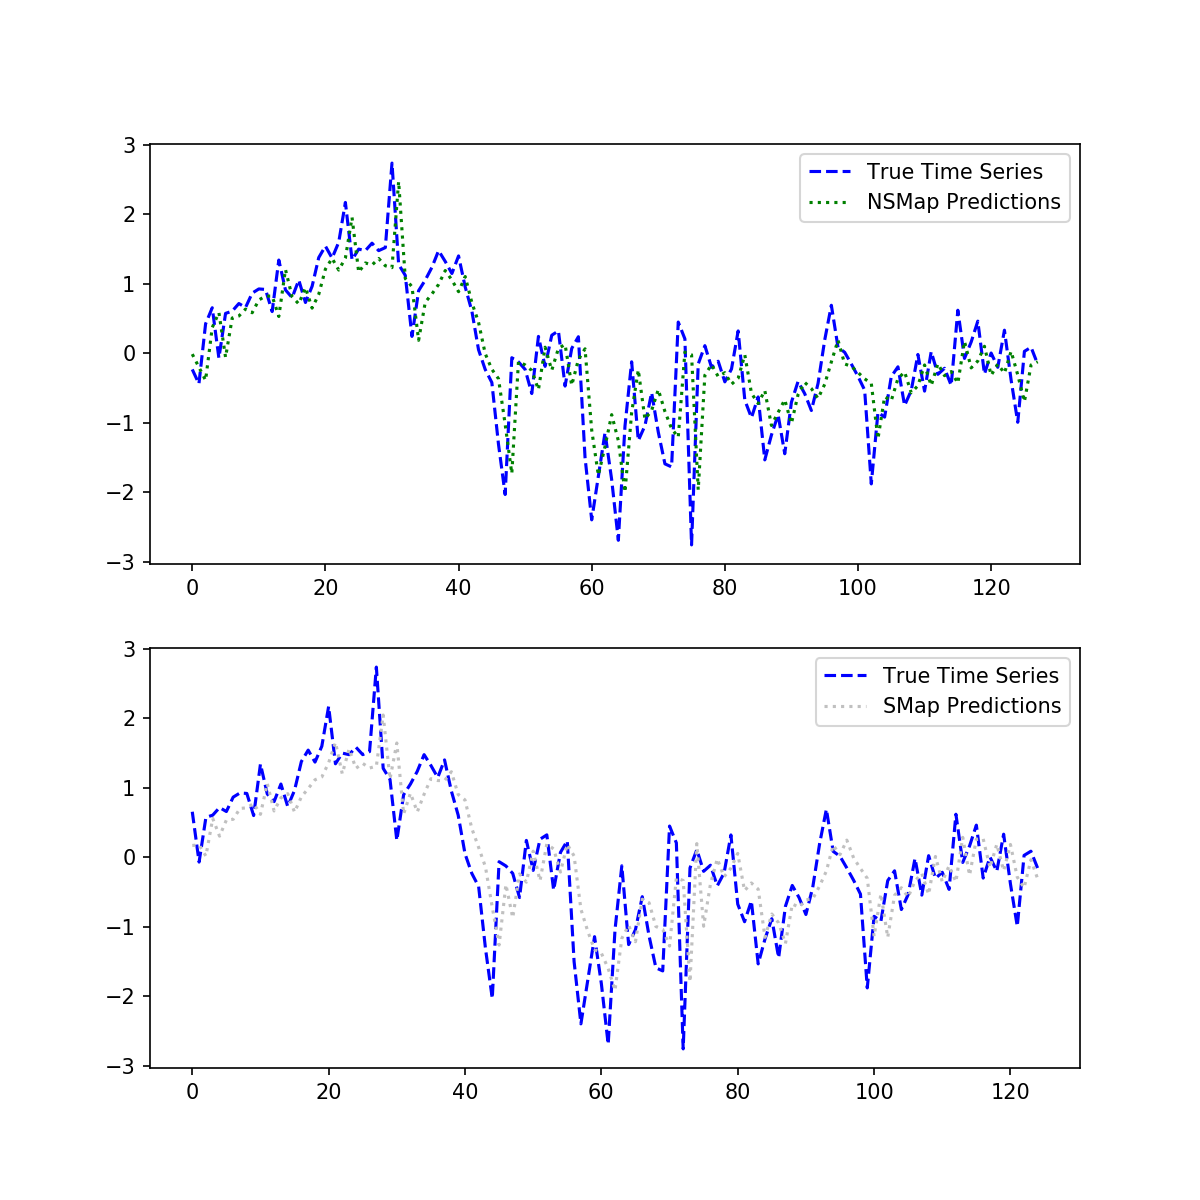

In [124]:
figLOU, axLOU = plt.subplots(2, figsize=(8,8))
axLOU[0].plot(Yn, c="blue", linestyle="dashed", label="True Time Series")
axLOU[0].plot(predictedTSNS, c="green", linestyle="dotted", label="NSMap Predictions")
axLOU[0].legend()

axLOU[1].plot(Ys, c="blue", linestyle="dashed", label="True Time Series")
axLOU[1].plot(predictedTSS, c="silver", linestyle="dotted", label="SMap Predictions")
axLOU[1].legend()
plt.show()

In [125]:
### SUMMARY ###

print(f"NSMap -- theta: {thetaNS:.3f}, delta: {deltaNS:.3f}, Min Error: {errorNS:.3f}, Optimal Embedding Dimension: {lagNS+2}, MSE: {MSENS}")
print(f"SMap -- theta: {thetaS:.3f}, Min Error: {errorS:.3f}, Optimal Embedding Dimension: {lagS+2}, MSE: {MSES}")

print(f"Improvement of NSMap: {errorS/errorNS:.3f}")

print(f"NSMap dof: {dofNS:.3f}")
print(f"SMap dof: {dofS:.3f}")

AkaikeTest(errorNS, errorS, dofNS, dofS, Xr.shape[0])

NSMap -- theta: 0.000, delta: 0.929, Min Error: 59.618, Optimal Embedding Dimension: 2, MSE: 0.4121244757604072
SMap -- theta: 0.000, Min Error: 60.651, Optimal Embedding Dimension: 5, MSE: 0.41122326694892924
Improvement of NSMap: 1.017
NSMap dof: 4.955
SMap dof: 5.000
Probability SMap beats NSMap:  0.31587458091110876


<IPython.core.display.Javascript object>


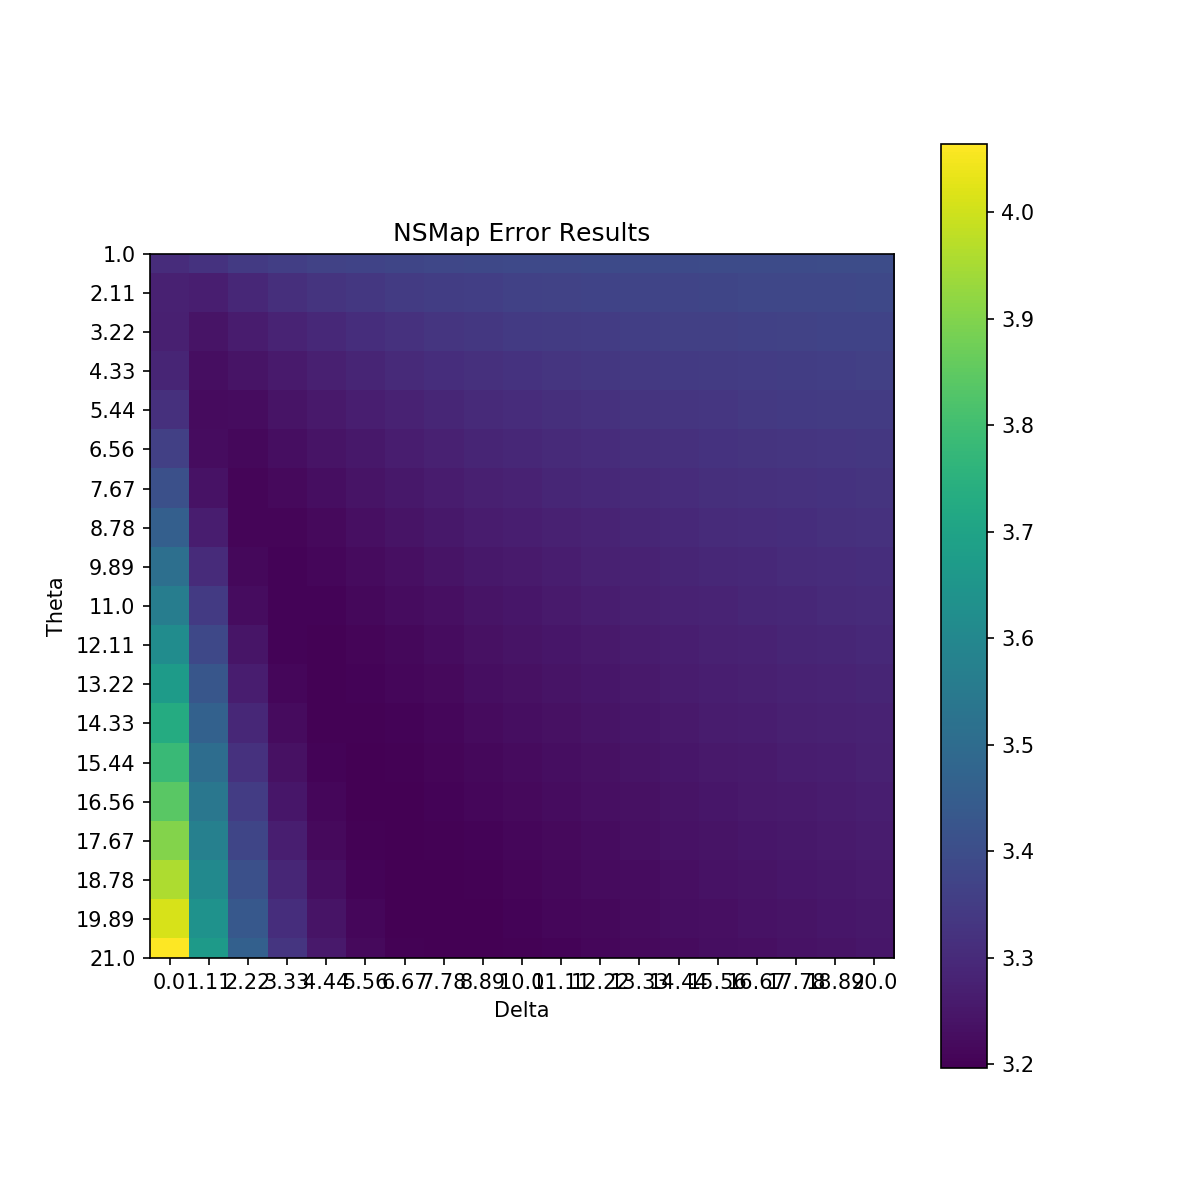

Min SMap Error: 26.407130560904307, Min NSMap Error: 24.447649894375097
Improvement of NSMap: 1.0801500624802405


In [72]:
d = 19
thetas = np.linspace(1,21,num=d)
deltas = np.linspace(0,20,num=d)

thetaB, deltaB, errMap = GMapOptimize(X, Y, tx,thetas, deltas)

thetaBS = thetas[np.argmin(errMap[:,0])]

<IPython.core.display.Javascript object>


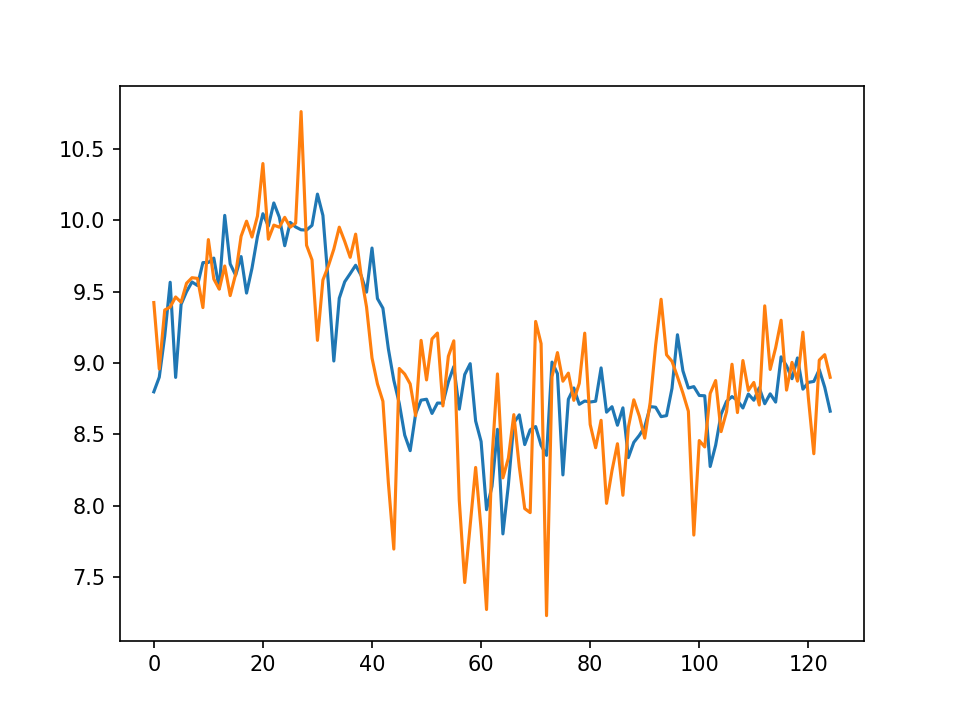

In [83]:
pred = leaveOneOut(X, Y, tx, thetaB, deltaB)

fig, ax = plt.subplots(1)
ax.plot(pred)

ax.plot(Y)

In [82]:

print(Y.shape, pred.shape)
scipy.stats.pearsonr(Y.flatten(), pred)


(125, 1) (125, 1)


(array([0.7393349945257591], dtype=object), 7.195883746719077e-23)

In [65]:
print(f"NSMap: theta={thetaB}, delta={deltaB}")
print(f"SMap: theta={thetaBS}")

NSMap: theta=21.0, delta=8.421052631578947
SMap: theta=3.1052631578947367


<IPython.core.display.Javascript object>


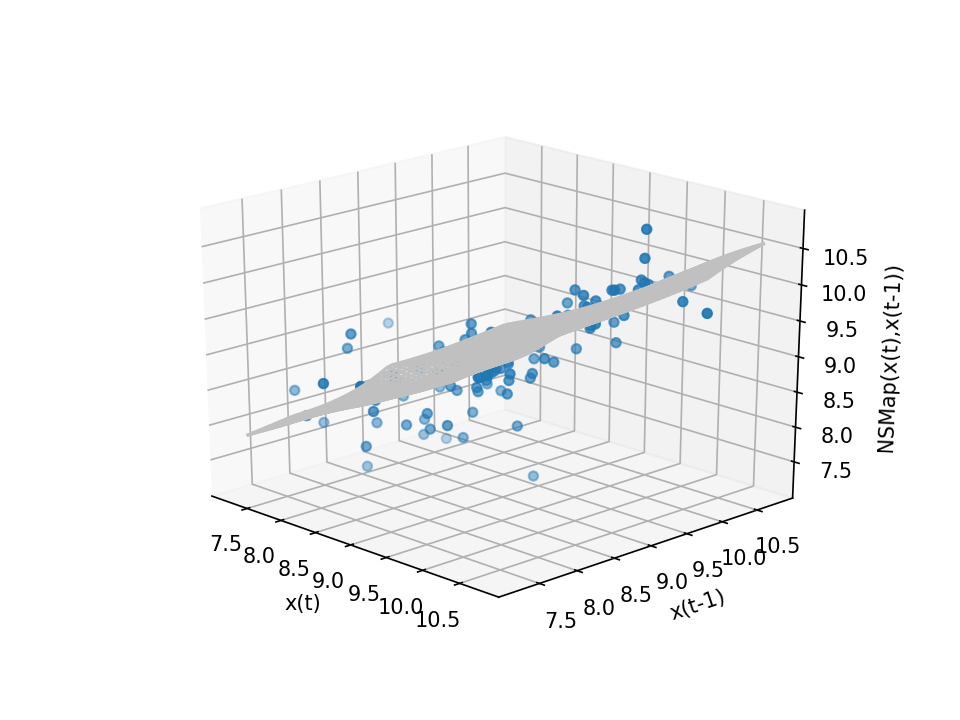

In [116]:
functionSurfaceSMap(s, 1, thetaS, 50)

<IPython.core.display.Javascript object>


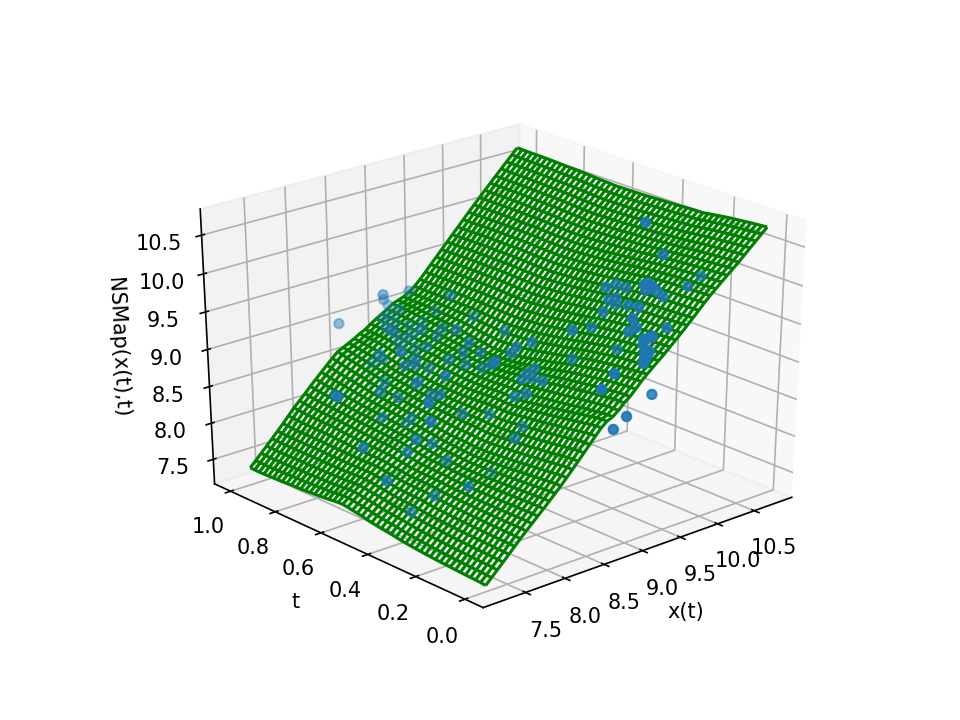

In [117]:
functionSurfaceNSMap(s,1,thetaNS,deltaNS,50)

In [71]:
lambdaLR, dof = likelihoodRatioTest(X, Y, tx, thetaBS, thetaB, deltaB, errMap)

Probabiliy of SMap superiority :  0.03074819406783247
LambdaLR =  9.551421408088109  dof =  3.365619669166392


In [14]:
# Plot Function Surface

# Parameters
theta = thetaBS
delta = 0
currentTime = 0

# Create Function Surface
res = 250
r = np.linspace(10, 15, num=res)
A, B = np.meshgrid(r,r)
C = np.zeros((res,res))
for i in range(res):
    for j in range(res):
        x=np.array([A[i,j],B[i,j]])
        C[i,j] = GMap(X, Y, tx, x, currentTime, theta, delta)


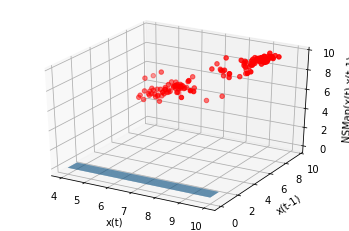

In [18]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(A, B, C)
ax.scatter(Y[2:],Y[1:-1],Y[:-2],c="red")
ax.set_xlabel("x(t)")
ax.set_ylabel("x(t-1)")
ax.set_zlabel("NSMap(x(t),x(t-1)")

plt.show()

In [16]:
# Plot Function Surface

# Parameters
theta = thetaB
delta = 0
currentTime = 0.75

# Create Function Surface
res = 500
r = np.linspace(4, 10, num=res)
T = np.linspace(0,1,num=res)
A, B = np.meshgrid(r,T)
C = np.zeros((res,res))
for i in range(res):
    for j in range(res):
        C[i,j] = GMap(X, Y, tx, A[i,j], B[i,j], theta, delta)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 2)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot_surface(A, B, C)
ax.set_xlabel("x(t)")
ax.set_ylabel("t")
ax.set_zlabel("NSMap(x(t),t)")

plt.show()

In [ ]:
# Plot Function Graph

# Plot Function Surface

# Parameters
theta = thetaB
delta = 0
currentTime = 0.5

# Create Function Surface
res = 500
r = np.linspace(7, 11, num=res)
N = np.zeros(res)
for i in range(res):
    N[i] = GMap(X, Y, tx, r[i], currentTime, theta, delta)

In [ ]:
fig, ax = plt.subplots(1)
ax.plot(r, N)
ax.set_xlabel("x(t)")
ax.set_ylabel("NSMap(x(t))")
plt.show()